# HT 5. Bayes Ingenuos

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/TheDeloz-v2/MD-HT5.git)

## Link al documento
El documento puede ser visualizado [acá](https://docs.google.com/document/d/1Jp1iNUj7YtKWbv_oFLG0HXBa_PGml2X7em-fcjTMteY/edit?usp=sharing)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Análisis exploratorio de los datos

In [42]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [44]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

### Inciso 2
#### Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los mismos de las hojas anteriores para que los modelos sean comparables.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


#Preparación de los Datos

# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['SalePriceCategory'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


X = datos.drop(['SalePrice', 'SalePriceCategory'], axis=1)
y = datos['SalePrice']


#Division de conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Aplicamos Naive Bayes

# Inicializar y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Predicciones y métricas
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {model.score(X_test, y_test)}')

Accuracy: 0.00684931506849315
RMSE: 57204.989286547134
R2: 0.00684931506849315


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Inciso 3
#### Analice los resultados del modelo de regresión. ¿Qué tan bien le fue prediciendo?

El modelo de Bayes ingenuo mostró un RMSE de 57,204.99, accuracy de 0.006849 y un R2 de 0.0068.

Al poseer un accuracy extremadamente bajo nos indica que la proporción de predicciones de precios de viviendas, poseera una exactitud tan baja que el modelo casi nunca cierta el precio correcto.

Al poseer un RMSW tan alto nos indica que, en promedio, las predicciones de precios de las viviendas se desvían más del valor real en el modelo.
Al poseer un R2  tan bajo, nos indica que el modelo actual explica menos del 1% de la variabilidad de los precios de las viviendas, lo cual muy poco efectivo.

La muy baja exactitud y el coeficiente R2, junto con un RMSE mayor, sugieren que el modelo no está capturando adecuadamente las tendencias en los datos.

### Inciso 4
#### Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo en las hojas pasadas. ¿Cuál funcionó mejor?

En base a los resultados obtuvidos con este modelo y comparandolos con los anteriores realizados en las otras 2 hojas de trabajo podemos concluir que a pesar que los otros 2 modelos tienen aspectos a mejorar, el modelo de regresión linela y el modelo de árbol de regresión tienen un mejor rendimiento y poseen mucho mejor RMSE, R2 y presición que el modelo de Bayes ingenuo

### Inciso 5
#### Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las casas (barata, media y cara) como variable respuesta

In [46]:

datos_precios = datos.copy()

# Definir los límites de las categorías basadas en los percentiles
bins = datos_precios['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['SalePriceCategory'] = pd.cut(datos_precios['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)

# Verificar cómo quedaron distribuidas las categorías
print(datos_precios['SalePriceCategory'].value_counts())

X = datos_precios.drop(['SalePrice', 'SalePriceCategory'], axis=1)
y = datos_precios['SalePriceCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Aplicamos Naive Bayes

# Inicializar y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)


SalePriceCategory
Alto     497
Bajo     483
Medio    480
Name: count, dtype: int64


### Inciso 6
#### Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar.


In [47]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7831050228310502


### Inciso 7
#### Análisis de eficiencia del algoritmo usando matriz de confusion

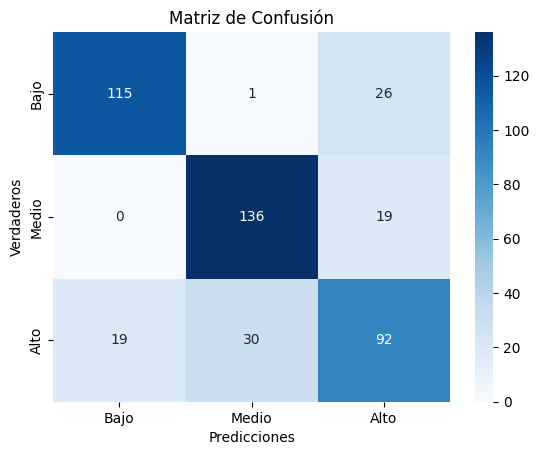

              precision    recall  f1-score   support

        Alto       0.86      0.81      0.83       142
        Bajo       0.81      0.88      0.84       155
       Medio       0.67      0.65      0.66       141

    accuracy                           0.78       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.78      0.78      0.78       438



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generar matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()
print(classification_report(y_test, y_pred))

### Inciso 8
#### Analice el modelo. ¿Cree que pueda estar sobre ajustado?

In [49]:
# Evaluar el modelo
y_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_prediction)

print(f'Accuracy in train: {train_accuracy}')
print(f'Accuracy in test: {accuracy}')

# utilizando el 3% como umbral para la detección de sobreajustes
if train_accuracy > accuracy + 0.03:
    print("Posible sobreajuste detectado.")
else:
    print("No es posible detectar el sobreajuste.")

Accuracy in train: 0.7818003913894325
Accuracy in test: 0.7831050228310502
No es posible detectar el sobreajuste.


### Inciso 9
#### Validacion cruzada

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir el clasificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Usar validación cruzada
scores = cross_val_score(clf, X, y, cv=5)  # cv es el número de pliegues en la validación cruzada

print("Precisión de validación cruzada: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Precisión de validación cruzada: 0.85 (+/- 0.03)


La presicion de validación cruzada en este modelo fue de 0.85 con una desviacion de +/- 0.03 y el del modelo de árboles de regresión 0.76 +/- 0.03 mostrando que el modelo com validación cruzada mostró por al menos un casi 10% un mejor rendimiento que el del modelo anterior.

### Inciso 10
### Hiperparámetros

Modelo de regresión

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparámetros a probar
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Inicializar y entrenar el modelo con GridSearchCV
model = GaussianNB()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model_regression = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_model_regression.predict(X_test)

# Evaluar el modelo
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2: {best_model_regression.score(X_test, y_test)}')

Modelo de comparación

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train, y_train)

# Mejor modelo
best_model_classification = grid_search_clf.best_estimator_

# Realizar predicciones
y_pred = best_model_classification.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

### Inciso 11
### Compación de árbol de decisión de clasificación y el modelo de random forest.